In [1]:
from moc.bootstrap.moving_block_bootstrap import MovingBlockBootstrap
import pandas as pd
import os
from moc.models.mqf2.lightning_module import MQF2LightningModule
from moc.models.trainers.lightning_trainer import get_lightning_trainer
from moc.configs.config import get_config
from moc.utils.run_config import RunConfig
import torch
from moc.metrics.metrics import *
from moc.conformal import *
torch.set_printoptions(sci_mode=False)
from moc.datamodules import load_datamodule
from moc.datamodules import bootstrap_load_datamodule
config = get_config()
config.device = 'cpu' # 'cuda' or 'cpu'

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Removed columns: 0 = 0 over 10
[0.4, 0.1, 0.3, 0.2]
<class 'torch.utils.data.dataset.Subset'>
<class 'moc.datamodules.base_datamodule.ScaledDataset'>
(tensor([ 0.3940,  0.3766, -0.4848, -0.5362, -0.5794, -0.7367,  0.0164,  1.4643,
         1.4482,  1.5195]), tensor([1.0512]))


c:\Users\jacam\5FINAL_YEAR_PROJECT\multi-output-conformal-regression\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\jacam\5FINAL_YEAR_PROJECT\multi-output-conformal-regression\.venv\Lib\site-packages\cpflows\flows\cpflows.py:164: UserWarning: brute force
  warnings.warn('brute force')
c:\Users\jacam\5FINAL_YEAR_PROJECT\multi-output-conformal-regression\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


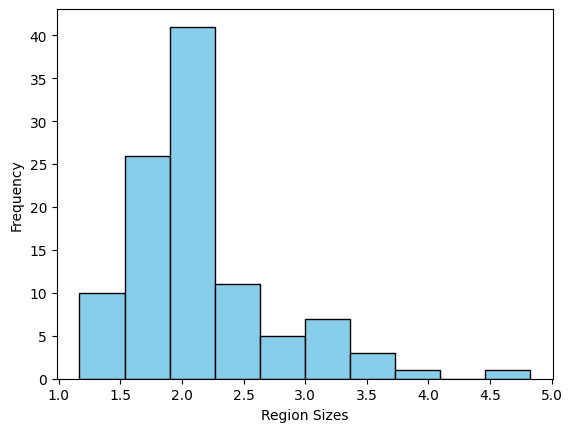

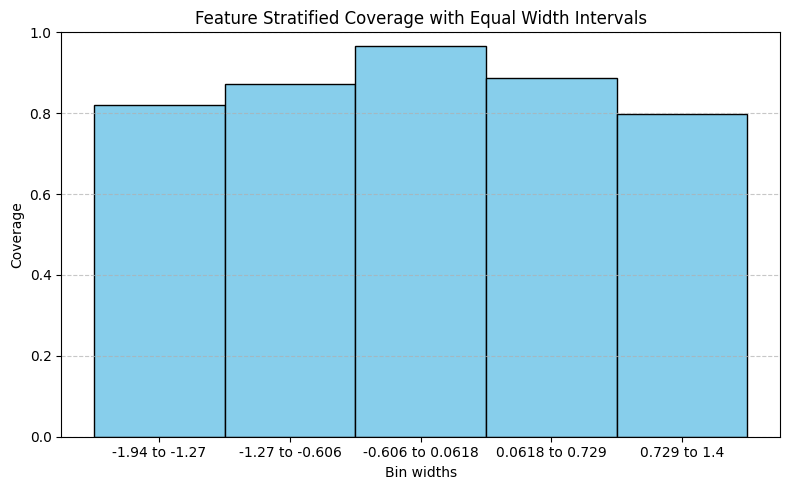

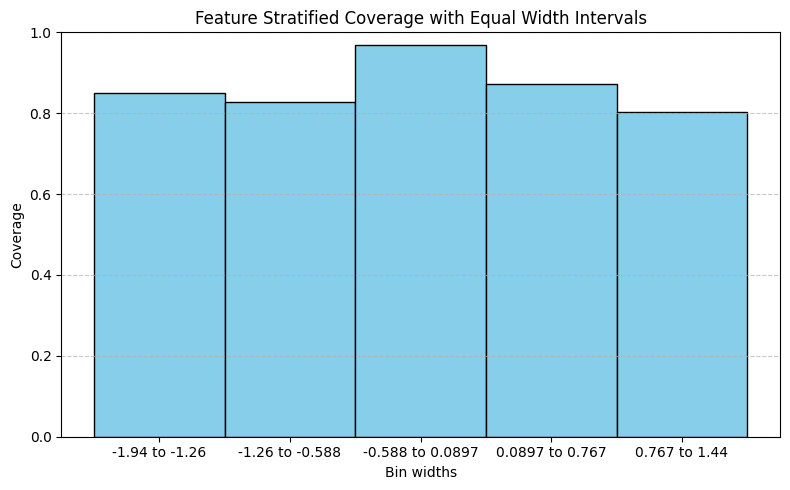

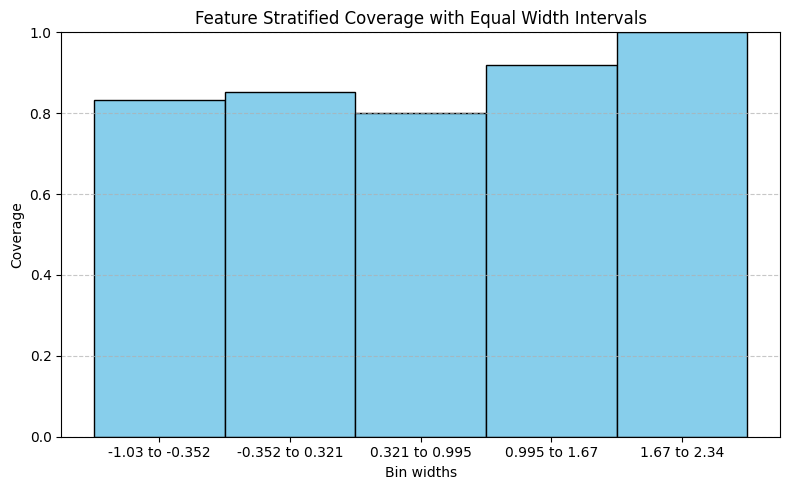

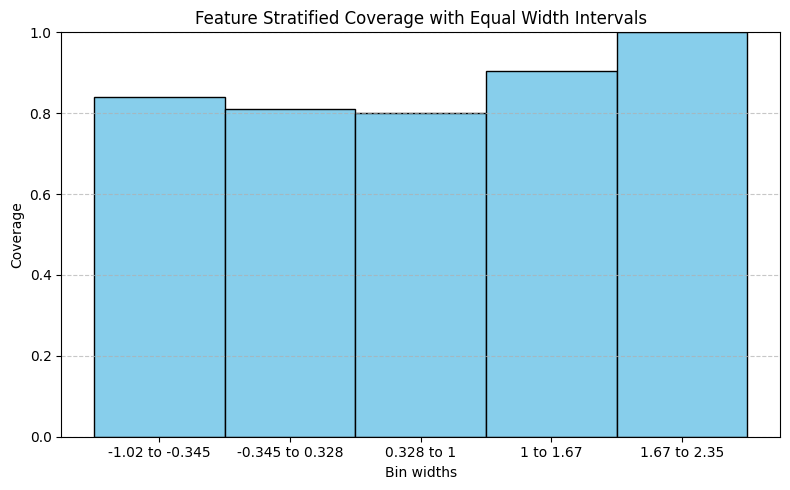

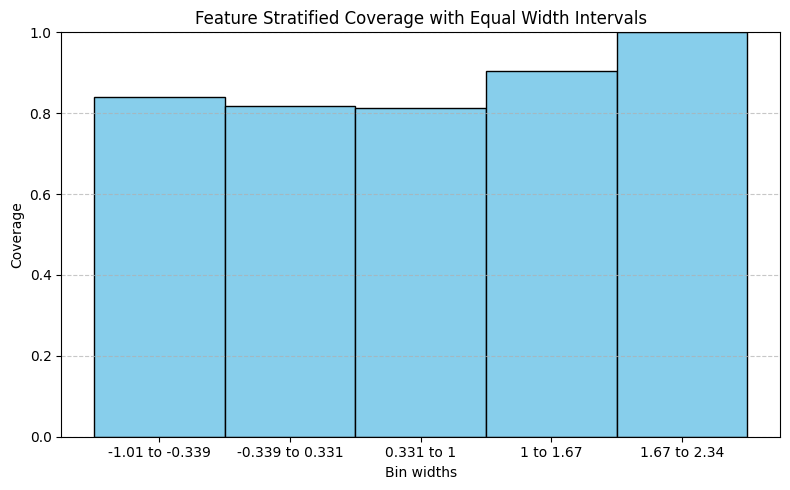

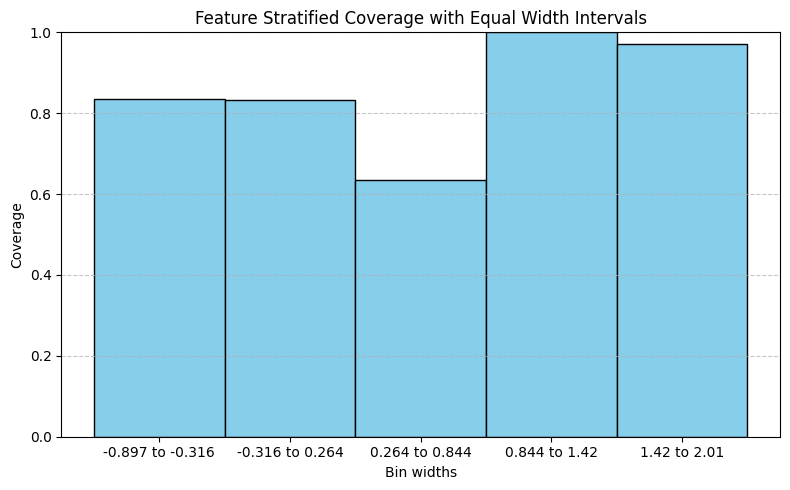

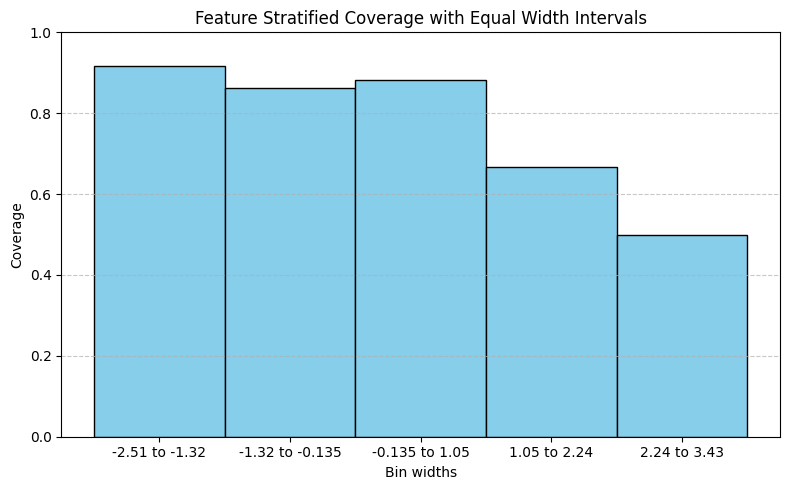

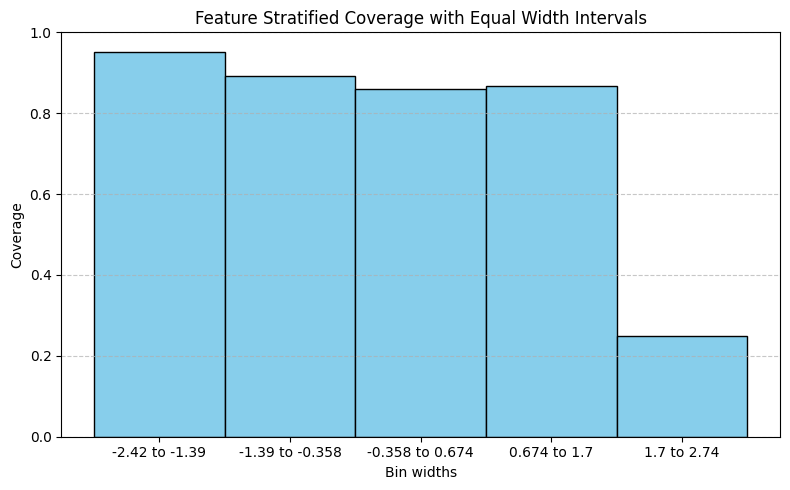

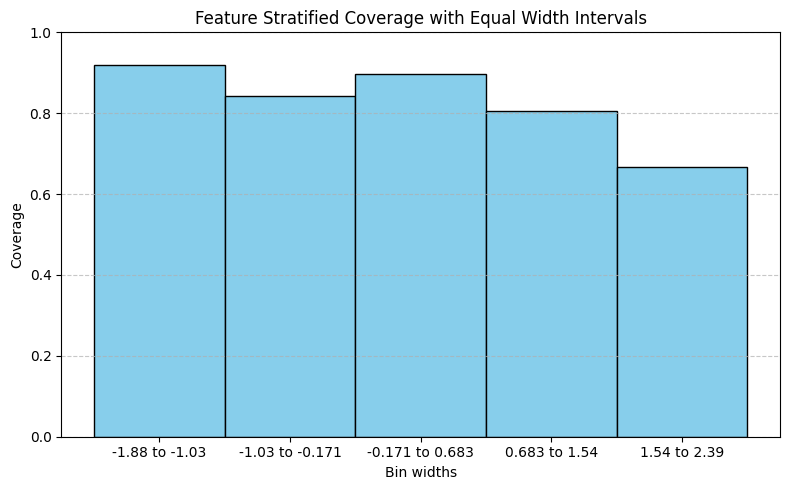

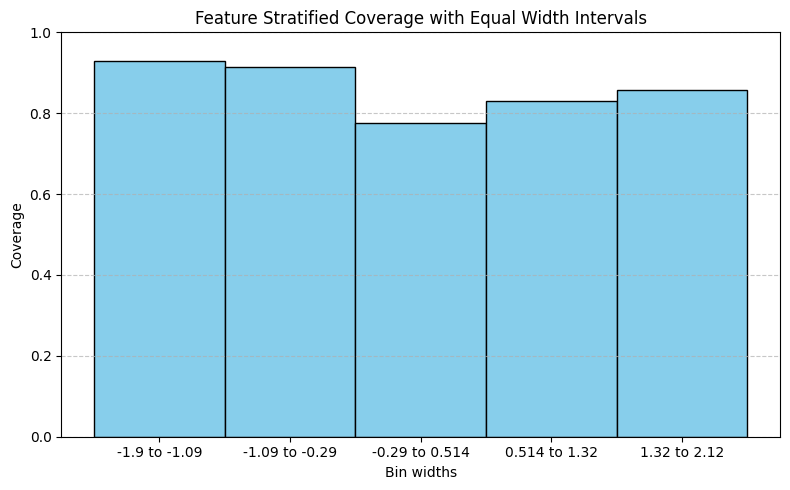

[0.8684, 0.8642, 0.8806, 0.8710000000000001, 0.8748000000000001, 0.8548, 0.7656000000000001, 0.764, 0.8262, 0.8614]


c:\Users\jacam\5FINAL_YEAR_PROJECT\multi-output-conformal-regression\.venv\Lib\site-packages\cpflows\flows\cpflows.py:164: UserWarning: brute force
  warnings.warn('brute force')


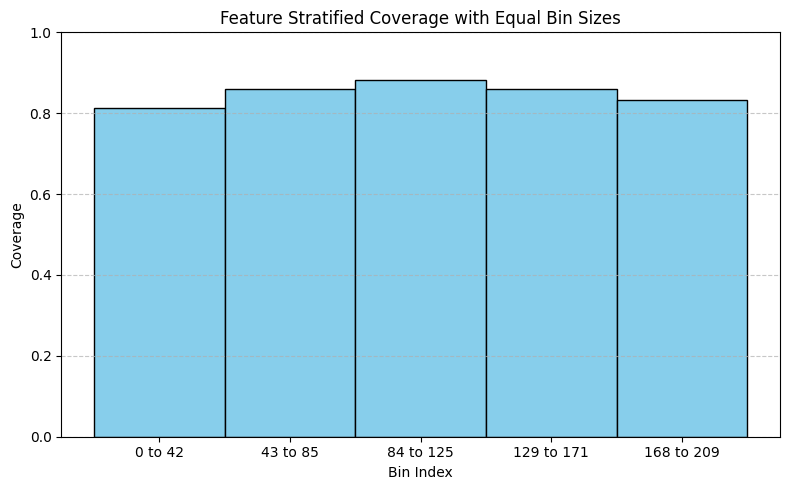

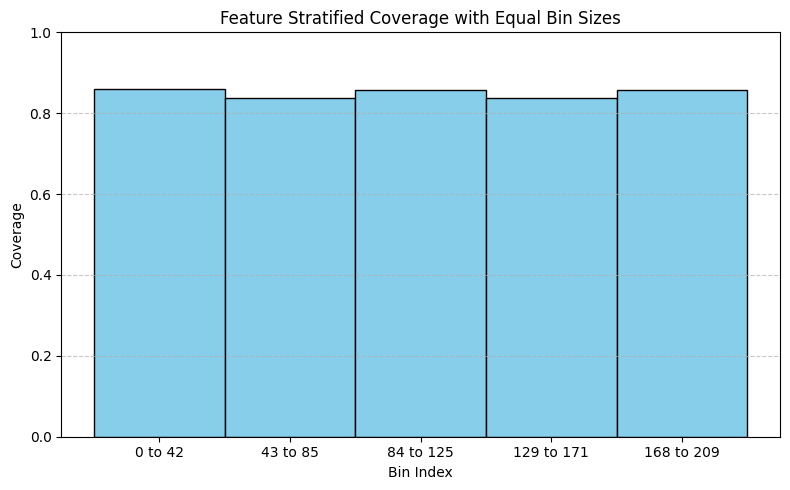

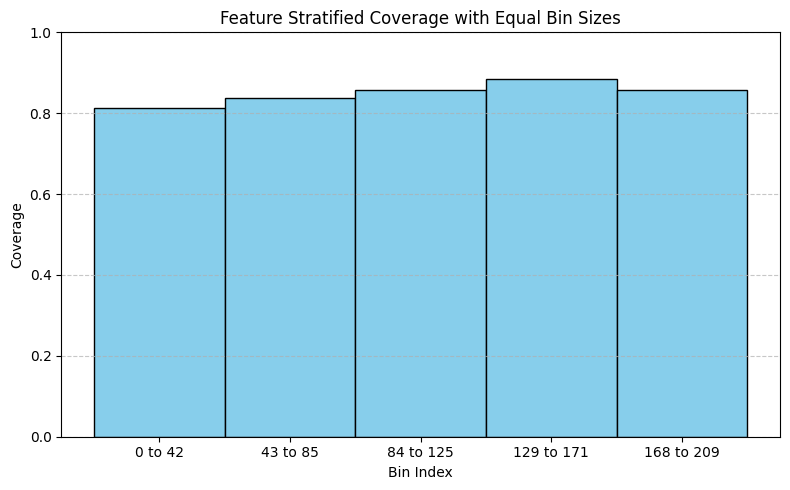

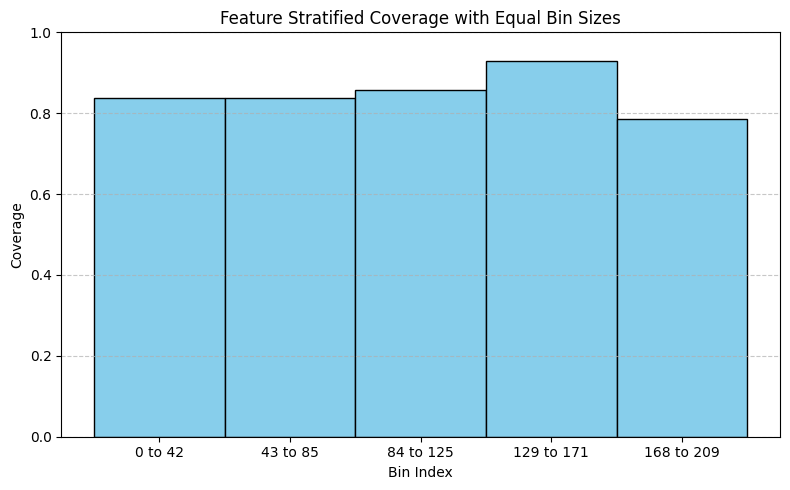

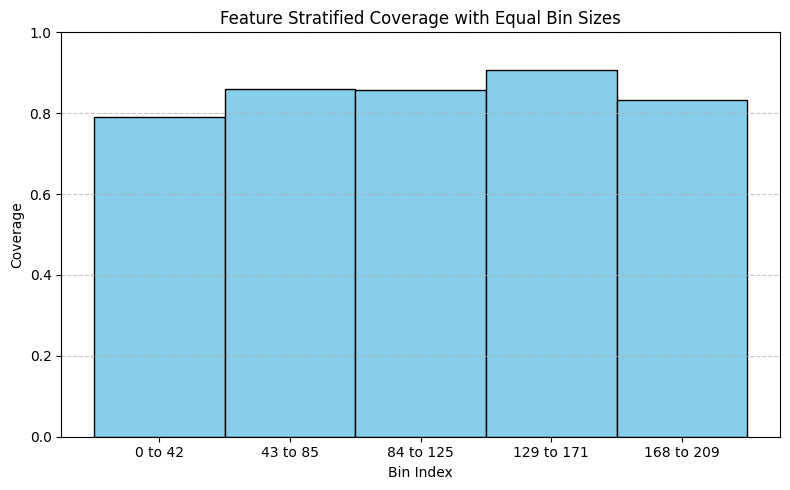

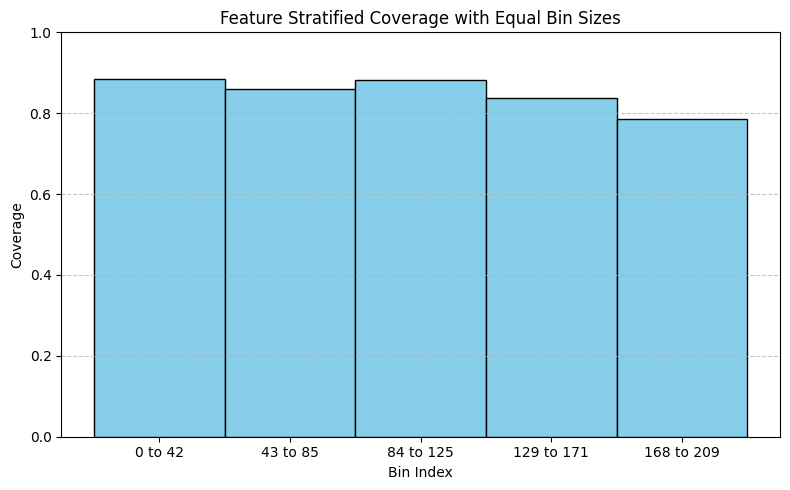

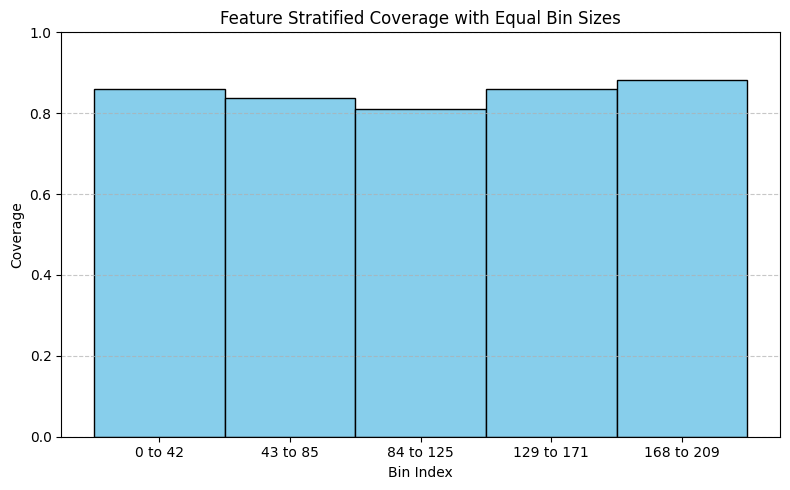

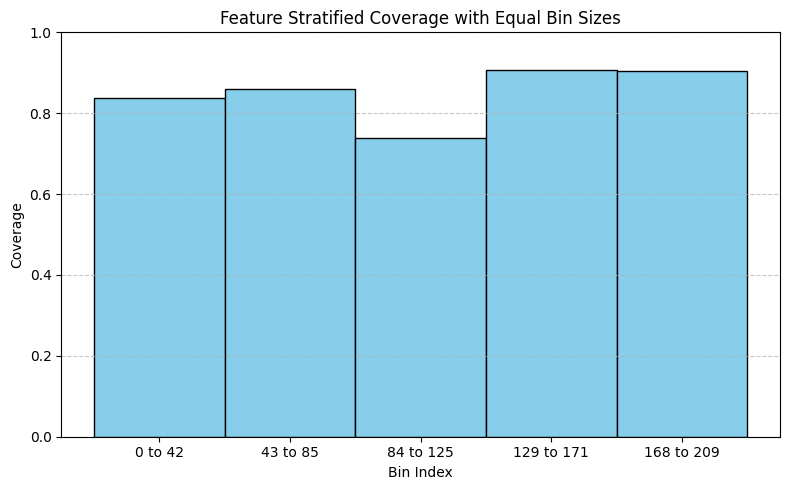

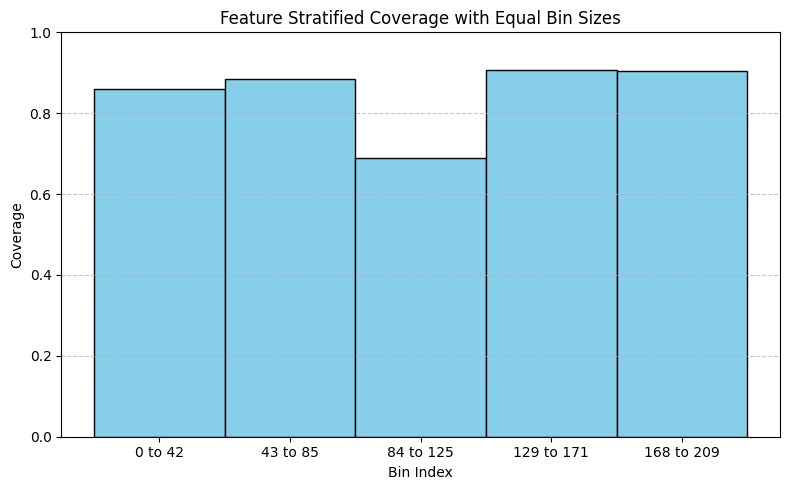

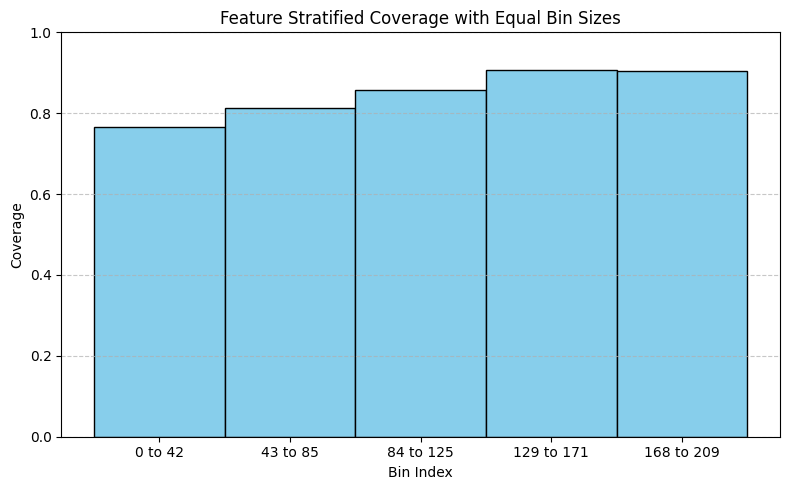

[0.8495999999999999, 0.8496, 0.8497999999999999, 0.8493999999999999, 0.8496, 0.8495999999999999, 0.8496, 0.8493999999999999, 0.8492000000000001, 0.85]


c:\Users\jacam\5FINAL_YEAR_PROJECT\multi-output-conformal-regression\.venv\Lib\site-packages\cpflows\flows\cpflows.py:164: UserWarning: brute force
  warnings.warn('brute force')


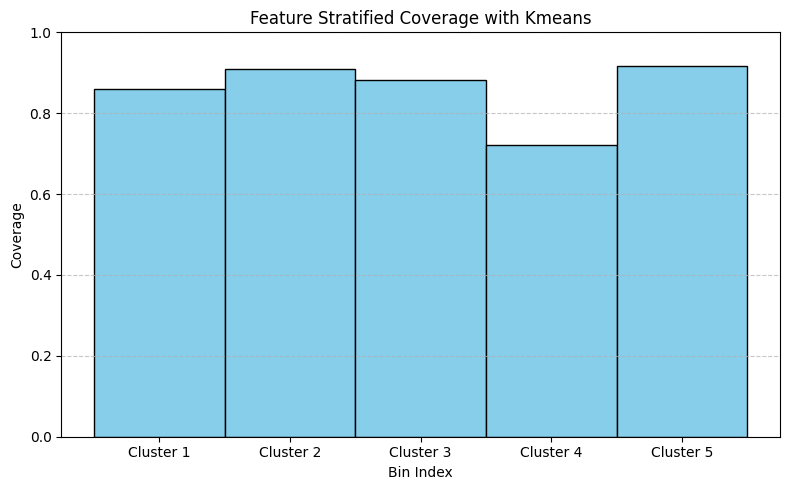

[0.859, 0.909, 0.882, 0.722, 0.917]


c:\Users\jacam\5FINAL_YEAR_PROJECT\multi-output-conformal-regression\.venv\Lib\site-packages\cpflows\flows\cpflows.py:164: UserWarning: brute force
  warnings.warn('brute force')


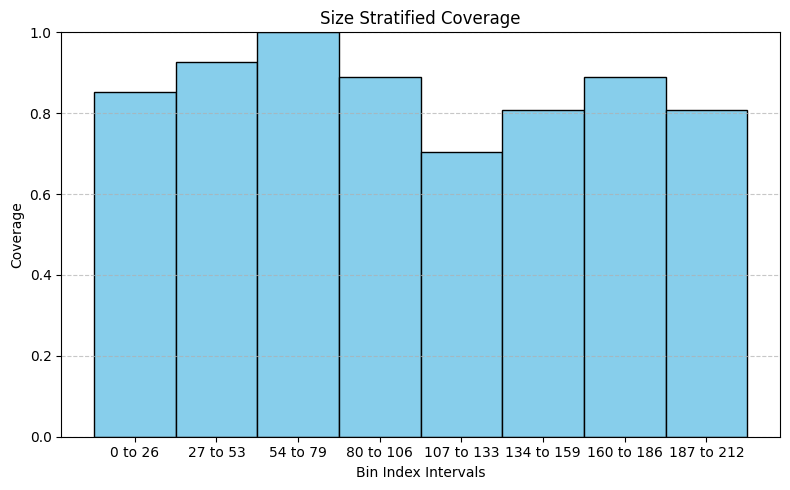

0.704


c:\Users\jacam\5FINAL_YEAR_PROJECT\multi-output-conformal-regression\.venv\Lib\site-packages\cpflows\flows\cpflows.py:164: UserWarning: brute force
  warnings.warn('brute force')
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


alpha: 0.1
marginal coverage: 0.8732394576072693
Removed columns: 0 = 0 over 10
tensors <torch.utils.data.dataset.TensorDataset object at 0x0000022108BB9110>
Removed columns: 0 = 0 over 10
tensors <torch.utils.data.dataset.TensorDataset object at 0x0000022108AB8310>


c:\Users\jacam\5FINAL_YEAR_PROJECT\multi-output-conformal-regression\.venv\Lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:654: Checkpoint directory C:\Users\jacam\5FINAL_YEAR_PROJECT\multi-output-conformal-regression\logs\2025-09-04\21-06-09\stocks\NVDA2025-8-27-20\0\checkpoints exists and is not empty.
c:\Users\jacam\5FINAL_YEAR_PROJECT\multi-output-conformal-regression\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\jacam\5FINAL_YEAR_PROJECT\multi-output-conformal-regression\.venv\Lib\site-packages\cpflows\flows\cpflows.py:164: UserWarning: brute force
  warnings.warn('brute force')
c:\Users\jacam\5FINAL_YEAR_PROJECT\multi-output-conformal-regression\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connect

In [ ]:

#Selected dataset the name of the file without .csv
dataset = 'NVDA2025-8-27-20'

#Runconfig to get the dataset
rc = RunConfig(config, 'stocks', dataset, 0, hparams={})

#takes the dataset and splits it into train_val_cal_test set
datamodule = load_datamodule(rc)
#getting training data for conformal predictor
train_batch = next(iter(datamodule.train_dataloader()))
train_x, train_y = train_batch
#getting test data from conformal predictor
scaled_test_X, scaled_test_Y = datamodule.data_test[:]

#getting input dimensions (how many features the input has) and output dimensions (how many features the output has)
p, q = datamodule.input_dim, datamodule.output_dim

#model instantiation
mqf2_model = MQF2LightningModule(p, q)
#trainer instantiation
trainer = get_lightning_trainer(rc)

#fit trainer
trainer.fit(mqf2_model,datamodule)
mqf2_model.to(config.device)
#conformal predictor instantiation
conformalizer = M_CP(datamodule.calib_dataloader(), mqf2_model)
#1 - confidence level
alpha = 0.1
#conformal prediction metrics
region_size(conformalizer,alpha,scaled_test_X,10,plot=True)
torch.set_printoptions(sci_mode=False)
print(continuous_fsc(conformalizer,alpha,scaled_test_X,scaled_test_Y,strat_tech="Equal_width",bins=5))
print(continuous_fsc(conformalizer,alpha,scaled_test_X,scaled_test_Y,strat_tech="Equal_bin_size",bins=5))
print(continuous_fsc(conformalizer,alpha,scaled_test_X,scaled_test_Y,strat_tech="kmeans",bins=5,x_train=train_x))
print(size_stratified_coverage(conformalizer,alpha,scaled_test_X,scaled_test_Y,8))
print(compute_marginal_coverage(conformalizer,alpha,scaled_test_X,scaled_test_Y))


#bootstrap runconfig
b_rc = RunConfig(config, 'stocks', dataset, 0, hparams={})
b_datamodule = bootstrap_load_datamodule(rc)
b_train_batch = next(iter(b_datamodule.train_dataloader()))
b_train_x, b_train_y = b_train_batch
b_scaled_test_X, b_scaled_test_Y = b_datamodule.data_test[:]


#bootstrap input dimensions
b_p, b_q = b_datamodule.input_dim, b_datamodule.output_dim
#model instantiation
b_mqf2_model = MQF2LightningModule(b_p, b_q)
#trainer instantiation
b_trainer = get_lightning_trainer(b_rc)

#1 -confidence level
alpha = 0.1
#bootstrap block size
block_size = 20
#bootstrap trials (2000 is roughly 4 hours on my laptop)
bootstrap_trials = 2000
#bootstrap model
mbb = MovingBlockBootstrap(block_size,bootstrap_trials,b_mqf2_model,b_rc,b_trainer,'cpu')
#compute bootstrap metrics
mbb.bootstrap_sample(alpha,True,True,True,True,True,True)
